# Importing Library

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor
import tensorflow as tf
import geopandas as gpd
import pandas as pd


from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



# To display 100 rows
pd.set_option('display.max_rows', 100)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/credit-profile-two-wheeler-loan-dataset/credit_data.csv


# About Data Set

#### 1. Age:
* Type: Integer
* Description: This denotes the age of the applicant. Age can often be used as a proxy for maturity and life stage.
* Range: 18 to 70 years
#### 2. Gender:
* Type: Categorical
* Description: Specifies the gender of the applicant.
* Categories: Male, Female, Other
#### 3. Income:
* Type: Integer
* Description: Represents the monthly or annual income of the applicant. It’s vital for understanding the applicant's ability to service a loan.
* Range: In multiples of 1,000 (e.g., 1,000; 2,000; 3,000, and so on)
#### 4. Credit Score: 
* Type: Integer
* Description: A numerical representation of the applicant's credit history. A higher score typically indicates better creditworthiness.
* Range: 300 to 850
#### 5. Credit History Length: 
* Type: Integer
* Description: Specifies how long the applicant has had credit. It can give insights into the applicant's credit management skills.
* Units: Months
#### 6. Number of Existing Loans: 
* Type: Integer
* Description: The total number of loans the applicant currently possesses. This can indicate an applicant's debt burden.
* Range: 0 to 10
#### 7. Loan Amount: 
* Type: Integer
* Description: The principal amount the applicant is requesting.
* Range: 0 to 150,000
#### 8. Loan Tenure: 
* Type: Integer
* Description: The desired duration over which the applicant wants to repay the loan.
* Units: Months
#### 9. Existing Customer: 
* Type: Categorical
* Description: Indicates whether the applicant has prior interactions or loans with the finance company.
* Categories: Yes, No
#### 10. State & City: 
* Type: Categorical
* Description: Specifies the geographical location of the applicant in India. This can sometimes be used to assess regional credit trends or risk factors.
* Categories: Different states and cities within India
#### 11. LTV Ratio: 
* Type: Float
* Description: The loan-to-value ratio is a risk assessment tool. It tells us how much of the asset's value is being financed. A high LTV might indicate a riskier loan.
* Range: 40% to 95%
#### 12. Employment Profile:
* Type: Categorical
* Description: Describes the employment nature of the applicant.
* Categories: Salaried, Self-Employed, Freelancer, Unemployed, Student
#### 13. Occupation: 
* Type: Categorical
* Description: The profession or job role of the applicant.
* Categories: Roles like Software Engineer, Doctor, Teacher, and so on
#### 14. Profile Score: 
* Type: Integer
* Description: An overall assessment score of the applicant based on prior loan repayment history. A high score suggests a more reliable applicant.
* Range: 0 to 100

# ****Importing Dataset****

In [3]:
df = pd.read_csv("/kaggle/input/credit-profile-two-wheeler-loan-dataset/credit_data.csv")
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

# EDA

## Gender Analysis:

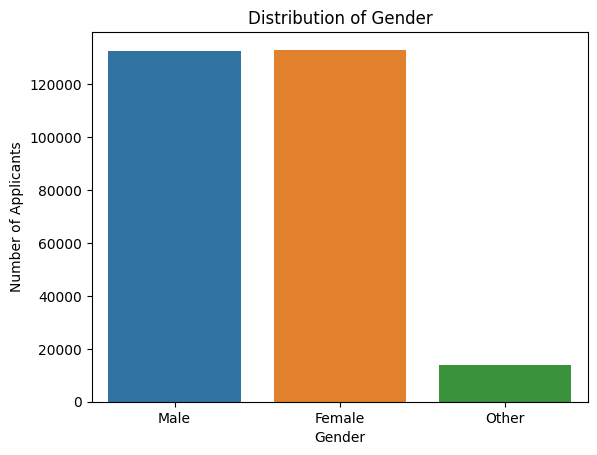

In [5]:
# Plotting the bar chart
sns.countplot(x='Gender', data=df, order=['Male', 'Female', 'Other'])
plt.title('Distribution of Gender')
plt.ylabel('Number of Applicants')
plt.xlabel('Gender')
plt.show()

## Gender & Age

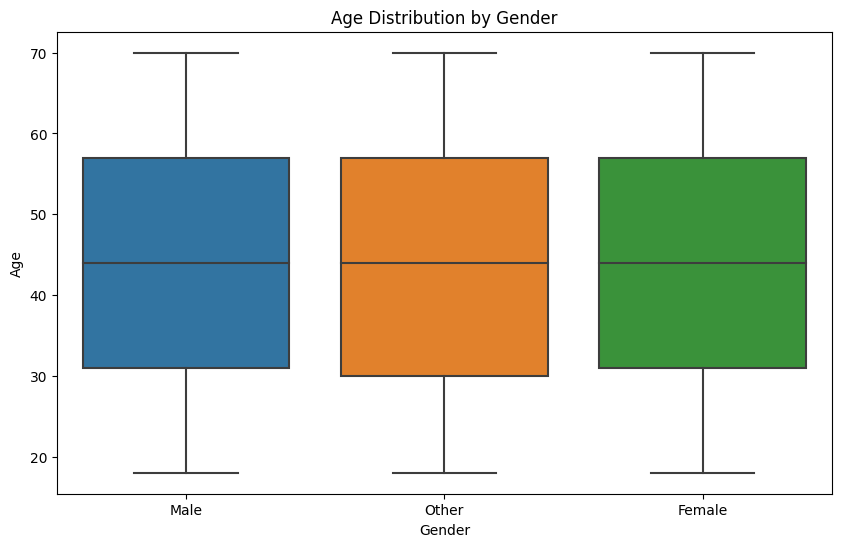

In [6]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df)

plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

## Statewise Distribution:

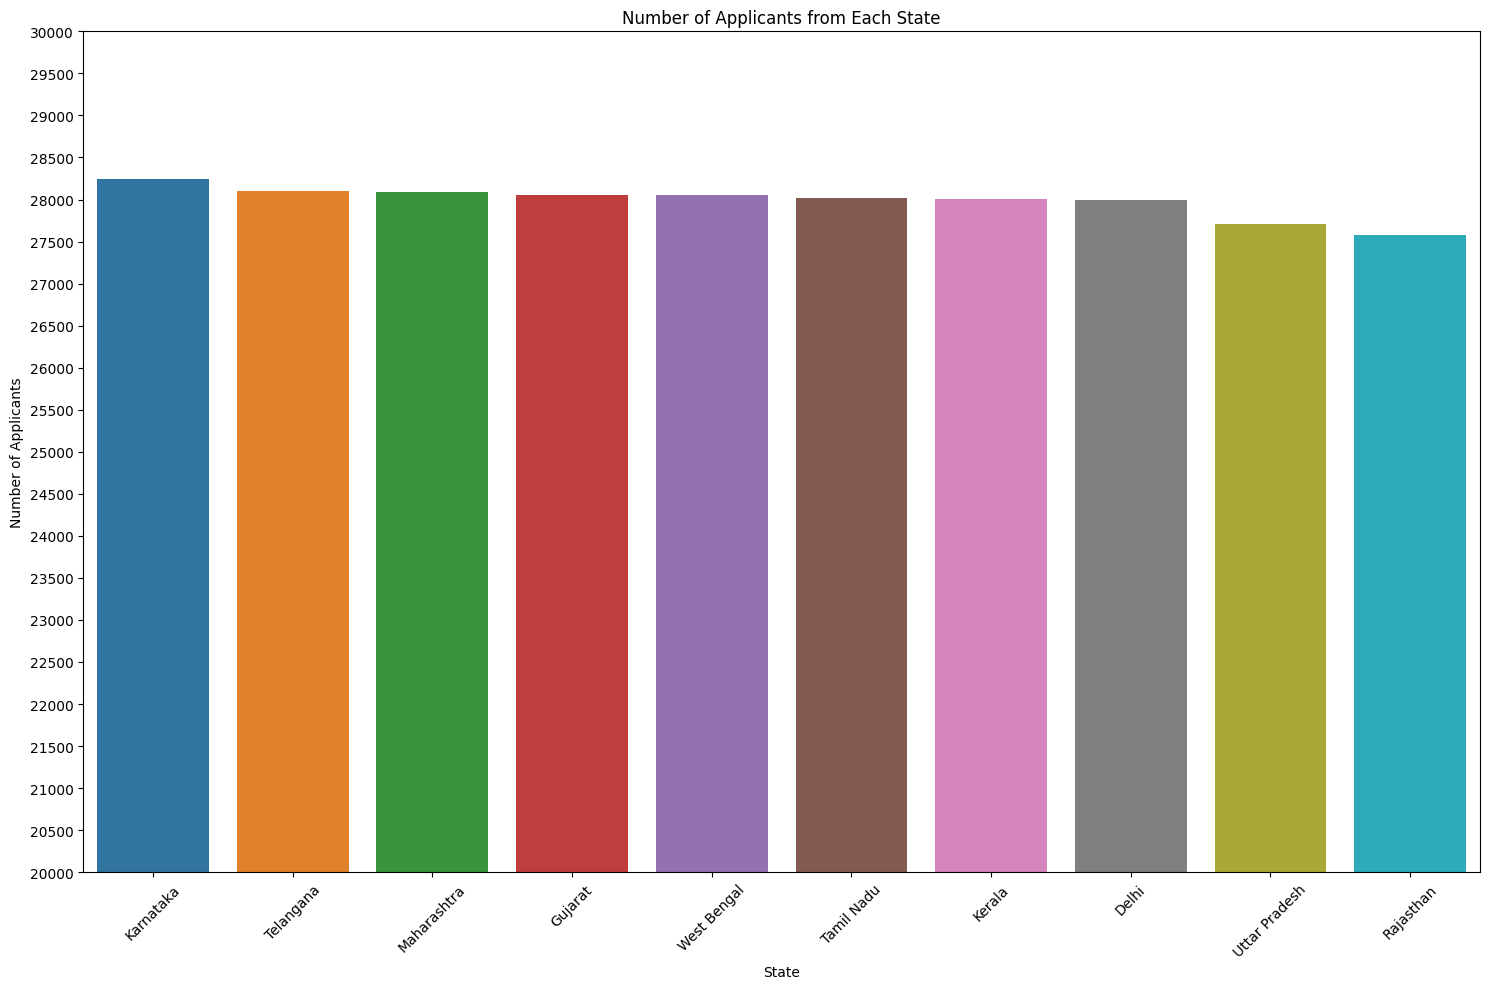

In [7]:
# Count the number of applicants for each state
state_counts = df['State'].value_counts()

# Plotting
plt.figure(figsize=(15,10))
sns.barplot(x=state_counts.index, y=state_counts.values)

plt.title('Number of Applicants from Each State')
plt.ylabel('Number of Applicants')
plt.xlabel('State')
plt.xticks(rotation=45)  # Rotating the x-labels for better readability

# Setting y-axis limits and adjusting y-tick frequency
plt.ylim(20000, 30000)
plt.yticks(list(range(20000, 30001, 500)))

plt.tight_layout()
plt.show()

## Citywise Distribution: 

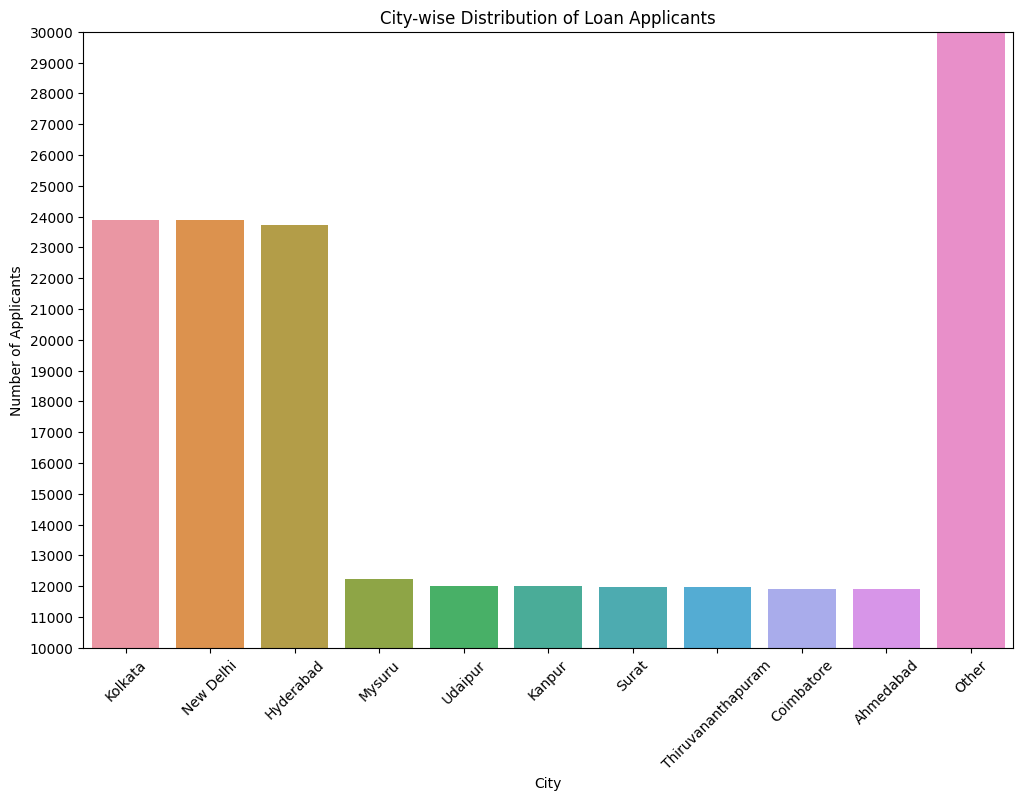

In [8]:
# Assuming your dataframe is named 'df'
city_counts = df['City'].value_counts()

# Make sure top_cities remains a Series object
top_cities = city_counts.head(10).copy()

# Group the smaller cities into 'Other'
other_count = city_counts.iloc[10:].sum()
top_cities['Other'] = other_count

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('City-wise Distribution of Loan Applicants')
plt.xlabel('City')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
 #Setting y-axis limits and adjusting y-tick frequency
plt.ylim(20000, 30000)
plt.yticks(list(range(10000, 30001, 1000)))
plt.show()


## Visualizing Distribution of Occupations:

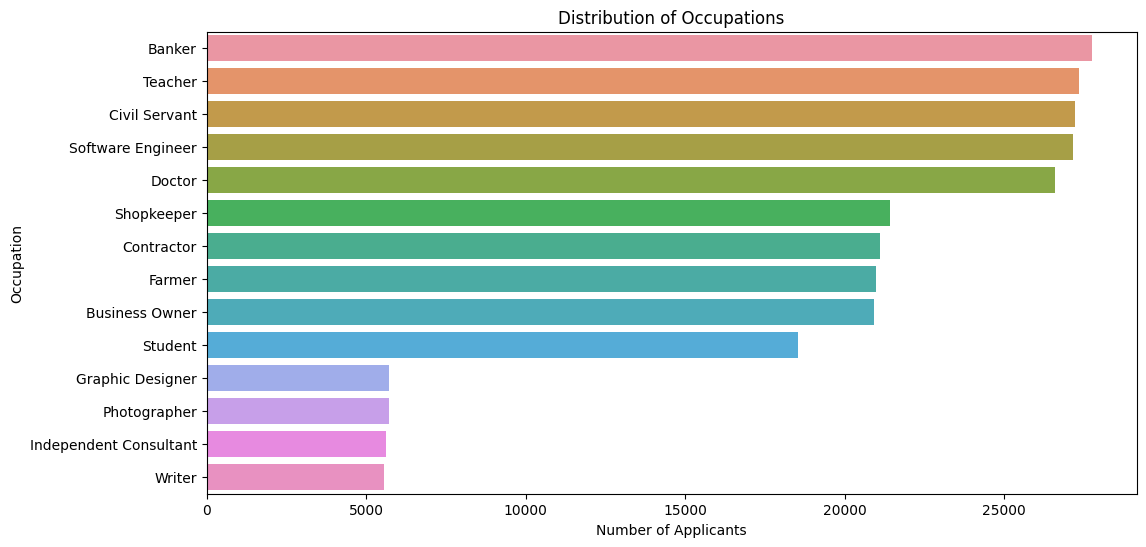

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index)
plt.title('Distribution of Occupations')
plt.xlabel('Number of Applicants')
plt.ylabel('Occupation')
plt.show()

## Visualizing Distribution of Employment Profiles:

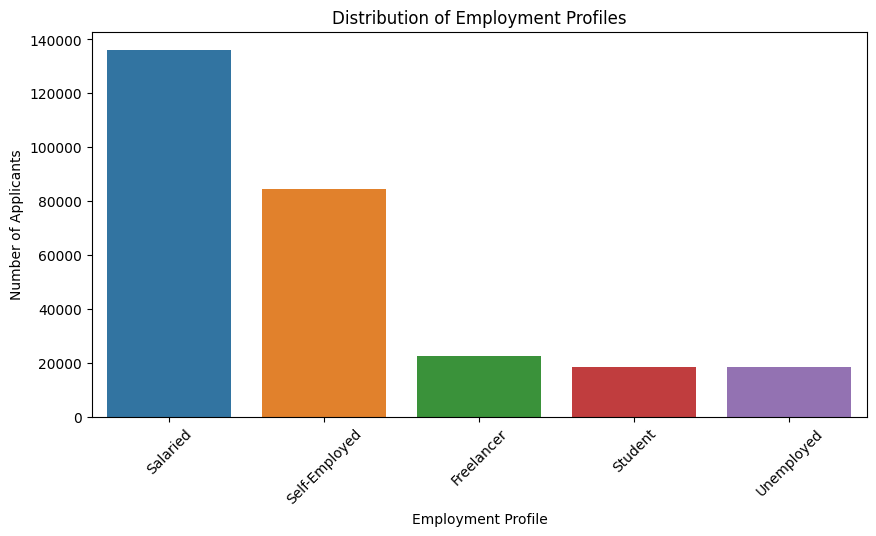

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Employment Profile', order=df['Employment Profile'].value_counts().index)
plt.title('Distribution of Employment Profiles')
plt.ylabel('Number of Applicants')
plt.xlabel('Employment Profile')
plt.xticks(rotation=45)
plt.show()

## Age vs. Employment Profile

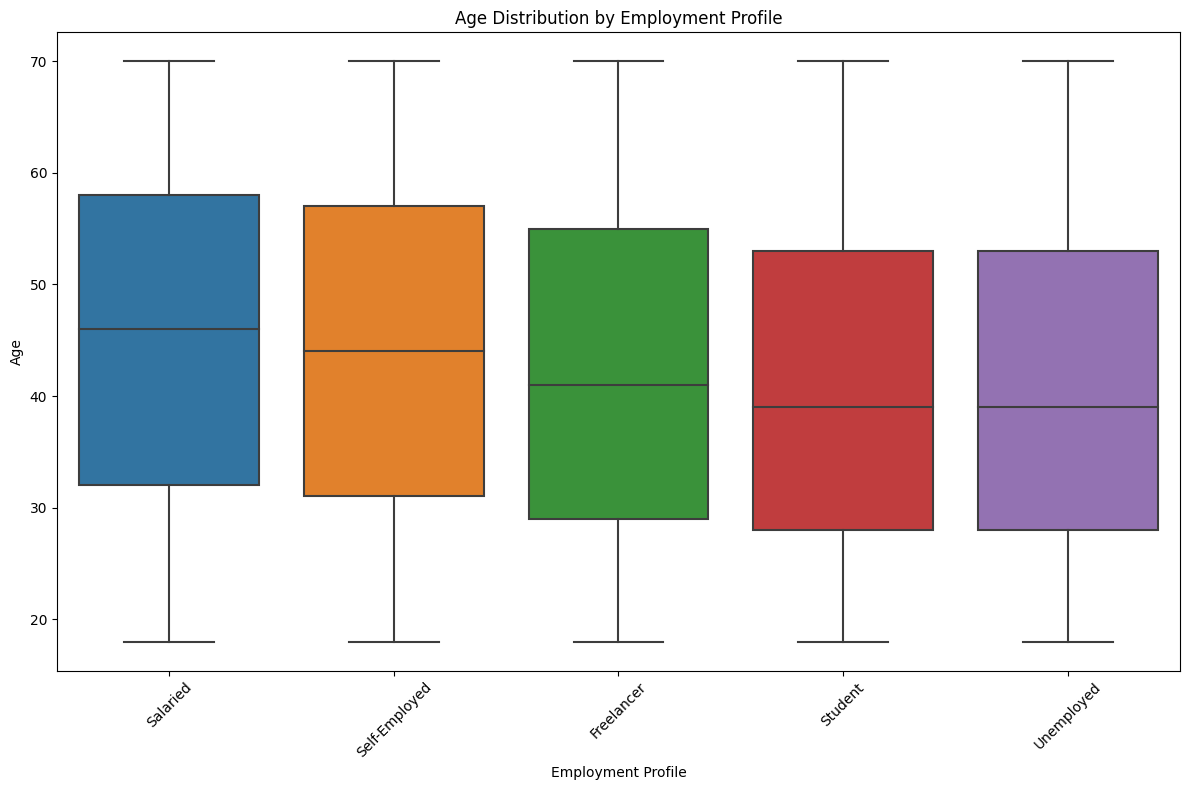

In [11]:
# Create the boxplot
plt.figure(figsize=(12, 8))  # Adjust the size of the figure as per your need
sns.boxplot(x='Employment Profile', y='Age', data=df)

plt.title('Age Distribution by Employment Profile')  # Title of the plot
plt.xlabel('Employment Profile')  # x-axis label
plt.ylabel('Age')  # y-axis label
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

## Group by Employment Profile and Age Group:

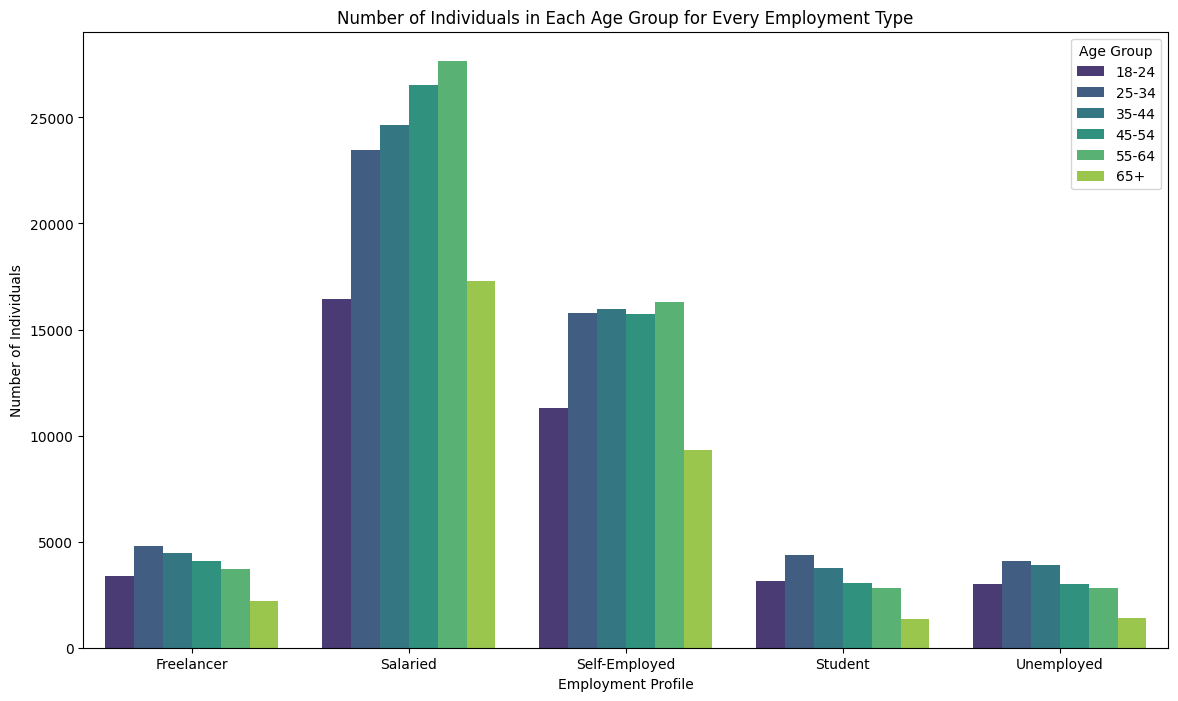

In [12]:
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
grouped_data = df.groupby(['Employment Profile', 'Age Group']).size().reset_index(name='Count')

plt.figure(figsize=(14,8))
sns.barplot(x='Employment Profile', y='Count', hue='Age Group', data=grouped_data, palette='viridis')
plt.title('Number of Individuals in Each Age Group for Every Employment Type')
plt.ylabel('Number of Individuals')
plt.xlabel('Employment Profile')
plt.legend(title='Age Group')
plt.show()

## Existing Loans:

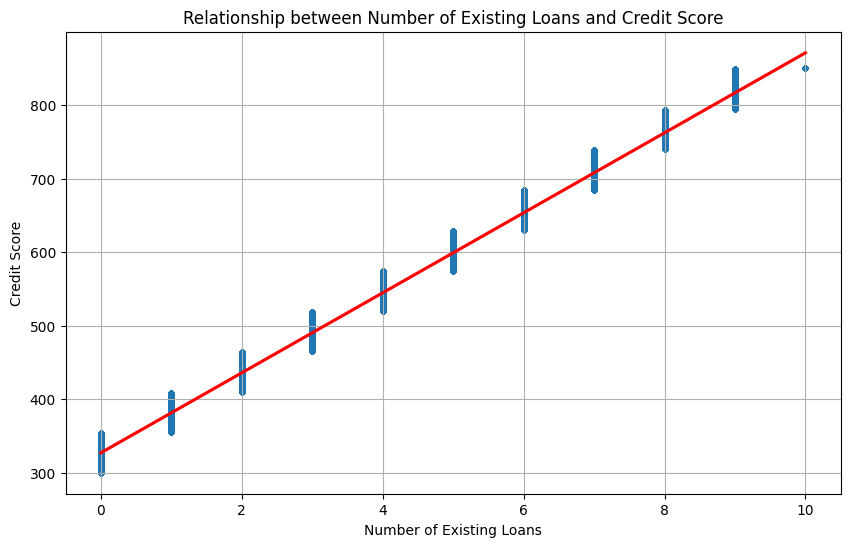

In [13]:
# Creating a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Number of Existing Loans', y='Credit Score', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})

plt.title('Relationship between Number of Existing Loans and Credit Score')
plt.xlabel('Number of Existing Loans')
plt.ylabel('Credit Score')
plt.grid(True)

plt.show()

***this Indicates a positive relationship.number of existing loans increases, the credit score tends to increase***

# ****Data Preprocessing****

## Handle Missing Values

In [14]:
df.isna().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
Age Group                       0
dtype: int64

In [15]:
df[df['Occupation'].isna()] #So we can clearly see that there is reason behind the missing value where employment profile is "Unemployed" there is  missing  value for Occupation
#so we can impute the Occupation as 'None'

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation,Age Group
25,61,Female,41000,307,104,0,23296,99,No,Rajasthan,Udaipur,58.686622,Unemployed,23,NaN,55-64
28,52,Female,87000,697,26,7,141231,70,Yes,Delhi,New Delhi,94.616809,Unemployed,58,NaN,45-54
31,57,Female,130000,850,600,10,56891,195,Yes,Telangana,Hyderabad,40.481983,Unemployed,96,NaN,55-64
33,53,Male,33000,428,576,2,99179,56,No,Delhi,New Delhi,53.836170,Unemployed,62,NaN,45-54
41,18,Other,16000,329,436,0,12592,119,No,Telangana,Hyderabad,94.802565,Unemployed,17,NaN,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279777,24,Female,67000,374,238,1,120860,81,No,Karnataka,Mysuru,52.352218,Unemployed,52,NaN,18-24
279792,24,Female,51000,514,549,3,150000,69,No,West Bengal,Kolkata,54.303719,Unemployed,80,NaN,18-24
279806,39,Male,22000,683,262,6,51961,261,Yes,West Bengal,Kolkata,93.614738,Unemployed,84,NaN,35-44
279825,70,Male,41000,626,151,5,139038,300,No,Telangana,Channarayapatna,53.113861,Unemployed,99,NaN,65+


In [16]:
mask = df['Employment Profile'] == 'Unemployed'
df.loc[mask, 'Occupation'] = df.loc[mask, 'Occupation'].fillna('None')
# now there is no missing value

In [17]:
# displaying column for better understanding and checking for noise
columns = ['Age', 'Gender', 'Number of Existing Loans', 'State', 'City', 'Employment Profile','Occupation']

for col in columns:
    unique_values = df[col].unique()
    num_unique_values = len(unique_values)
    print("================================")
    print(f"\nColumn: {col}")
    print(f"Number of Unique Values: {num_unique_values}")
    
    # Displaying all unique values if there are less than 10, else display the first 10
    if num_unique_values <= 10:
        print(f"Unique Values: {unique_values}")
    else:
        print(f"Unique Values: {unique_values} ...")


Column: Age
Number of Unique Values: 53
Unique Values: [31 25 62 69 52 64 29 30 39 68 19 59 26 57 42 34 20 56 37 61 54 24 23 53
 40 67 70 63 28 18 60 21 43 47 55 65 36 27 50 38 45 33 41 58 51 48 49 46
 22 44 66 35 32] ...

Column: Gender
Number of Unique Values: 3
Unique Values: ['Male' 'Other' 'Female']

Column: Number of Existing Loans
Number of Unique Values: 11
Unique Values: [ 5  2 10  6  1  8  4  0  9  3  7] ...

Column: State
Number of Unique Values: 10
Unique Values: ['Karnataka' 'Uttar Pradesh' 'Tamil Nadu' 'West Bengal' 'Rajasthan'
 'Maharashtra' 'Gujarat' 'Telangana' 'Kerala' 'Delhi']

Column: City
Number of Unique Values: 23
Unique Values: ['Mysuru' 'Bengaluru' 'Kanpur' 'Coimbatore' 'Lucknow' 'Kolkata' 'Jaipur'
 'Nagpur' 'Surat' 'Hyderabad' 'Chennai' 'Thiruvananthapuram' 'Udaipur'
 'New Delhi' 'Mumbai' 'Manjari' 'Dhulagori' 'Pune' 'Nellikuppam' 'Kochi'
 'Ahmedabad' 'Channarayapatna' 'Bishanpura'] ...

Column: Employment Profile
Number of Unique Values: 5
Unique Values: ['S

## Feature Encoding

In [18]:
#so there is 6 categorical column
print("======Categorical Column========")
cat_col=[]
for col in df.columns:
    if df[col].dtype == 'O':
        cat_col.append(col)
print (cat_col)

======Categorical Column========
['Gender', 'Existing Customer', 'State', 'City', 'Employment Profile', 'Occupation']


In [19]:
# displaying column with catgorical values

for col in cat_col:
    unique_values = df[col].unique()
    num_unique_values = len(unique_values)
    print("================================")
    print(f"\nColumn: {col}")
    print(f"Number of Unique Values: {num_unique_values}")
    
    # Displaying all unique values if there are less than 10, else display the first 10
    if num_unique_values <= 10:
        print(f"Unique Values: {unique_values}")
    else:
        print(f"Unique Values: {unique_values} ...")


Column: Gender
Number of Unique Values: 3
Unique Values: ['Male' 'Other' 'Female']

Column: Existing Customer
Number of Unique Values: 2
Unique Values: ['No' 'Yes']

Column: State
Number of Unique Values: 10
Unique Values: ['Karnataka' 'Uttar Pradesh' 'Tamil Nadu' 'West Bengal' 'Rajasthan'
 'Maharashtra' 'Gujarat' 'Telangana' 'Kerala' 'Delhi']

Column: City
Number of Unique Values: 23
Unique Values: ['Mysuru' 'Bengaluru' 'Kanpur' 'Coimbatore' 'Lucknow' 'Kolkata' 'Jaipur'
 'Nagpur' 'Surat' 'Hyderabad' 'Chennai' 'Thiruvananthapuram' 'Udaipur'
 'New Delhi' 'Mumbai' 'Manjari' 'Dhulagori' 'Pune' 'Nellikuppam' 'Kochi'
 'Ahmedabad' 'Channarayapatna' 'Bishanpura'] ...

Column: Employment Profile
Number of Unique Values: 5
Unique Values: ['Salaried' 'Self-Employed' 'Freelancer' 'Student' 'Unemployed']

Column: Occupation
Number of Unique Values: 15
Unique Values: ['Doctor' 'Software Engineer' 'Banker' 'Contractor' 'Teacher' 'Farmer'
 'Writer' 'Shopkeeper' 'Photographer' 'Student' 'Civil Servan

In [20]:
#performing Onehot-encoding
existing_columns = ['Gender', 'State', 'City', 'Occupation','Employment Profile','Existing Customer']  # Adjust based on the columns present in df
df = pd.get_dummies(df, columns=existing_columns, drop_first=True)
df.head()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score,Age Group,...,Occupation_Shopkeeper,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher,Occupation_Writer,Employment Profile_Salaried,Employment Profile_Self-Employed,Employment Profile_Student,Employment Profile_Unemployed,Existing Customer_Yes
0,31,36000,604,487,5,109373,221,90.943430,77,25-34,...,False,False,False,False,False,True,False,False,False,False
1,25,50000,447,386,2,150000,89,91.135253,43,25-34,...,False,True,False,False,False,True,False,False,False,False
2,62,178000,850,503,10,69099,110,40.000000,90,55-64,...,False,False,False,False,False,True,False,False,False,True
3,69,46000,668,349,6,150000,148,87.393365,86,65+,...,False,False,False,False,False,False,True,False,False,True
4,52,132000,601,553,5,150000,157,66.158757,90,45-54,...,False,False,False,True,False,True,False,False,False,False


In [21]:
# converting the boolean col into int type
for col in df.columns:
    if df[col].dtypes == 'bool':
        df[col] = df[col].astype(int)

## Feature Scaling

In [22]:
# using Min-Max normalization
# Instantiate the scaler
sc = MinMaxScaler()

#column to normalize
col= ['Income', 'Age','Credit History Length','Number of Existing Loans','Loan Amount','Loan Tenure','LTV Ratio','Profile Score']
df[col] = sc.fit_transform(df[col])

# **Feature Engineering & Selection**

## Correlation Analysis 


Check which features are most correlated with Credit Score

In [23]:
# Compute the Income-to-Loan Amount Ratio
df['Income_to_Loan_Ratio'] = df['Income'] / df['Loan Amount']  # This is indicating how easy it would be for an applicant to pay off the loan.
# scaling the new column
col= ['Income_to_Loan_Ratio']
df[col] = sc.fit_transform(df[col])
df.head()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score,Age Group,...,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher,Occupation_Writer,Employment Profile_Salaried,Employment Profile_Self-Employed,Employment Profile_Student,Employment Profile_Unemployed,Existing Customer_Yes,Income_to_Loan_Ratio
0,0.250000,0.135,604,0.795041,0.5,0.719245,0.602305,0.926244,0.77,25-34,...,0,0,0,0,1,0,0,0,0,0.006485
1,0.134615,0.205,447,0.628099,0.2,1.000000,0.221902,0.929732,0.43,25-34,...,1,0,0,0,1,0,0,0,0,0.007083
2,0.846154,0.845,850,0.821488,1.0,0.440929,0.282421,0.000000,0.90,55-64,...,0,0,0,0,1,0,0,0,1,0.066217
3,0.980769,0.185,668,0.566942,0.6,1.000000,0.391931,0.861698,0.86,65+,...,0,0,0,0,0,1,0,0,1,0.006392
4,0.653846,0.615,601,0.904132,0.5,1.000000,0.417867,0.475614,0.90,45-54,...,0,0,1,0,1,0,0,0,0,0.021250


In [24]:
df.dropna(inplace=True)

In [25]:
df.drop('Age Group',axis =1,inplace = True)

**using Pearson Correlation Coefficient for corelation analysis**

In [26]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score,Gender_Male,...,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher,Occupation_Writer,Employment Profile_Salaried,Employment Profile_Self-Employed,Employment Profile_Student,Employment Profile_Unemployed,Existing Customer_Yes,Income_to_Loan_Ratio
Age,1.000000,0.622852,0.127562,0.001511,0.127122,0.267702,0.063168,-0.042077,0.105192,0.000264,...,0.024766,-0.057388,0.023624,-0.013684,0.072323,-0.000654,-0.057388,-0.051116,0.081322,0.399009
Income,0.622852,1.000000,0.220242,0.001998,0.219690,0.387716,0.107711,-0.071834,0.183062,-0.001403,...,0.044012,-0.096404,0.042301,-0.025986,0.123041,0.000173,-0.096404,-0.089435,0.143056,0.643435
Credit Score,0.127562,0.220242,1.000000,0.001914,0.994557,0.084296,0.645865,-0.378271,0.775920,-0.003130,...,0.021984,-0.046678,0.025492,-0.011539,0.069435,-0.006015,-0.046678,-0.048799,0.833187,0.142043
Credit History Length,0.001511,0.001998,0.001914,1.000000,0.001947,0.001666,-0.003424,0.000616,0.000205,-0.001076,...,0.002366,-0.006572,-0.004950,-0.000124,0.004075,0.001018,-0.006572,0.002122,0.003354,0.003628
Number of Existing Loans,0.127122,0.219690,0.994557,0.001947,1.000000,0.084086,0.641752,-0.379119,0.764559,-0.003248,...,0.021849,-0.046726,0.025567,-0.011990,0.069071,-0.005810,-0.046726,-0.048740,0.830994,0.141425
Loan Amount,0.267702,0.387716,0.084296,0.001666,0.084086,1.000000,0.046449,-0.030184,0.069269,0.000555,...,0.013362,-0.029026,0.015583,-0.007561,0.042815,-0.001894,-0.029026,-0.029381,0.053869,-0.327852
Loan Tenure,0.063168,0.107711,0.645865,-0.003424,0.641752,0.046449,1.000000,-0.245074,0.492362,-0.000587,...,0.010754,-0.020332,0.014092,-0.007667,0.035579,-0.002597,-0.020332,-0.028284,0.622784,0.065730
LTV Ratio,-0.042077,-0.071834,-0.378271,0.000616,-0.379119,-0.030184,-0.245074,1.000000,-0.543221,0.003757,...,-0.007574,0.013586,-0.004734,0.002309,-0.021673,-0.000366,0.013586,0.020225,-0.396733,-0.044830
Profile Score,0.105192,0.183062,0.775920,0.000205,0.764559,0.069269,0.492362,-0.543221,1.000000,-0.005211,...,0.065664,-0.126547,0.065617,-0.017003,0.197200,-0.049986,-0.126547,-0.132420,0.592391,0.118542
Gender_Male,0.000264,-0.001403,-0.003130,-0.001076,-0.003248,0.000555,-0.000587,0.003757,-0.005211,1.000000,...,0.002837,0.003500,0.000860,0.001840,0.002487,-0.004038,0.003500,-0.001718,-0.001408,-0.003182


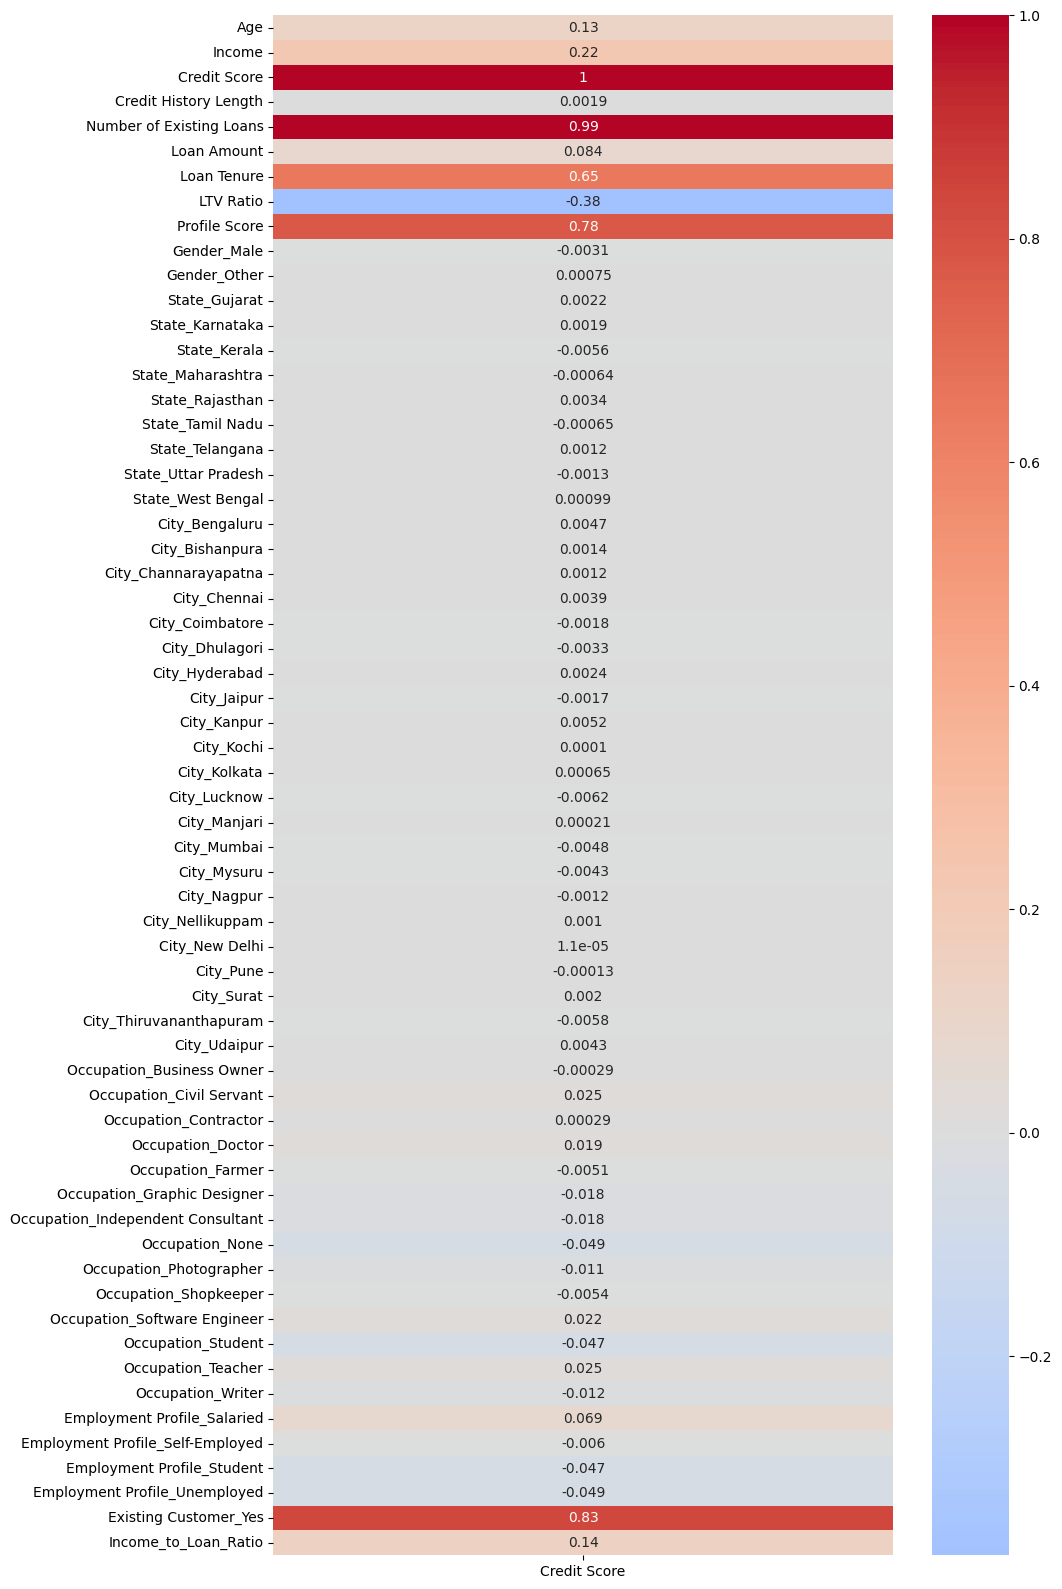

In [27]:
# using headmap for better understanding
plt.figure(figsize=(10, 20))
correlations_with_target = df.corr().loc[:, 'Credit Score']
sns.heatmap(correlations_with_target.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.show()
# so we can see the important column 

# Model Development

## Data Splitting

In [28]:
X=df.drop('Credit Score',axis=1)
y=df['Credit Score']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Selection 

### 1. **Linear Regression**

#### Train the Model

In [55]:
# Initializing the model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# making predictions on the test set.
y_pred = model.predict(X_test)

In [56]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results.head(10)

,Actual,Predicted
179597,793,762.799316
31833,427,433.353027
11359,395,391.406006
237443,847,818.396240
181187,546,541.175537
166238,621,595.677979
251878,432,431.671875
236283,405,384.149170
34752,771,764.060059
189802,799,806.617676


#### Evaluating the Model


In [57]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Setting squared=False gives RMSE directly

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 259.57846727287983
Root Mean Squared Error: 16.111439019307984


## Model Tuning & Evaluating: 

***Function For traing and Evaluating the performance of Model***

In [58]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """
    Parameters:
    - model: the machine learning model/algorithm to be trained.
    - X_train, y_train: training data and labels.
    - X_test, y_test: testing data and labels.

    Returns:
    - Accuracy of the model on the test data.
    """

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    # Compute accuracy
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    
    return mse,rmse,df_results

### 2.**Decision Tree Regressor**

In [59]:
# Initializing the model
regressor = DecisionTreeRegressor()


param_grid = {
    'max_depth': [50,60,70],
#     'criterion':['friedman_mse', 'absolute_error'],
    'splitter':['best','random'],
}  


# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_

# Print the best hyperparameters and model
print("Best Parameters:", best_params)
#print("Best Model:", best_model)



Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'max_depth': 60, 'splitter': 'best'}


In [60]:
# evaluating decision tree 
mse_val, rmse_val, sample_df = train_and_evaluate(DecisionTreeRegressor(splitter='best',max_depth=50), X_train, y_train, X_test, y_test)
print(f"MSE: {mse_val}")
print(f"RMSE: {rmse_val}")
print("===========================")
sample_df.head(10)

MSE: 53.36406083709465
RMSE: 7.305070898841068


,Actual,Predicted
179597,793,793.0
31833,427,427.0
11359,395,395.0
237443,847,847.0
181187,546,546.0
166238,621,621.0
251878,432,432.0
236283,405,405.0
34752,771,771.0
189802,799,799.0


### 3.**Random Forest**

In [61]:
# Initializing the model
regressor = RandomForestRegressor()


param_grid = {
    'n_estimators':[140,150,160],
    'max_depth':[10,30,50],
    
}  


# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_

# Print the best hyperparameters and model
print("Best Parameters:", best_params)
#print("Best Model:", best_model)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ......................max_depth=50, splitter=random; total time=   3.1s
[CV] END ......................max_depth=50, splitter=random; total time=   3.1s
[CV] END ........................max_depth=60, splitter=best; total time=   5.0s
[CV] END ........................max_depth=70, splitter=best; total time=   5.3s
[CV] END ......................max_depth=70, splitter=random; total time=   2.2s
[CV] END ........................max_depth=50, splitter=best; total time=   5.1s
[CV] END ........................max_depth=60, splitter=best; total time=   5.0s
[CV] END ......................max_depth=60, splitter=random; total time=   3.4s
[CV] END ......................max_depth=70, splitter=random; total time=   3.5s
[CV] END ........................max_depth=50, splitter=best; total time=   4.9s
[CV] END ........................max_depth=60, splitter=best; total time=   5.2s
[CV] END ......................max_depth=60, spli

In [62]:
# evaluating decision tree 
mse_val, rmse_val, sample_df = train_and_evaluate(RandomForestRegressor(max_depth=50,n_estimators=160), X_train, y_train, X_test, y_test)
print(f"MSE: {mse_val}")
print(f"RMSE: {rmse_val}")
print("===========================")
sample_df.head(10)

MSE: 41.48079258840121
RMSE: 6.440558406567027


,Actual,Predicted
179597,793,764.10000
31833,427,429.68750
11359,395,391.61875
237443,847,839.36875
181187,546,544.29375
166238,621,613.06250
251878,432,432.48750
236283,405,403.30625
34752,771,770.36250
189802,799,806.89375


### 4.**Simple stacking ensemble  Algorithm**

In [63]:
# Define and train base models
lin_reg = LinearRegression().fit(X_train, y_train)
rf_reg = RandomForestRegressor(max_depth=50,n_estimators=160,random_state=42).fit(X_train, y_train)
dt_reg = DecisionTreeRegressor(splitter='best',max_depth=50,random_state=42).fit(X_train, y_train)

In [64]:
# Predictions on the validation set
lin_pred = lin_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)
dt_pred = dt_reg.predict(X_test)

# Stacking: Combine the predictions to form a new dataset
stacked_predictions = np.column_stack((lin_pred, rf_pred, dt_pred))

# Train the meta-model
meta_model = LinearRegression().fit(stacked_predictions, y_test)

# Here, for demonstration purposes, we'll predict on the validation set again
stacked_test = np.column_stack((lin_reg.predict(X_test), rf_reg.predict(X_test), dt_reg.predict(X_test)))
final_predictions = meta_model.predict(stacked_test)


In [65]:
# Evaluate the performance
mse = mean_squared_error(y_test, final_predictions)
print(f"Mean Squared Error of Stacked Model: {mse}")

df_results = pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions})
df_results

Mean Squared Error of Stacked Model: 34.0335431815161


,Actual,Predicted
179597,793,774.553872
31833,427,428.757686
11359,395,392.225885
237443,847,843.782833
181187,546,546.138318
...,...,...
127858,718,717.343502
245789,587,586.430040
184772,634,633.896998
237678,413,416.991674


### 5.**XGBoost**

In [66]:
# Initializing the model
regressor = XGBRegressor()


param_grid = {
    'n_estimators':[30,35,40],
    'max_depth':[20,25,30],
    'learning_rate': [0.7,0.8],
    
}  


# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid=param_grid,scoring='r2', cv=3, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_

# Print the best hyperparameters and model
print("Best Parameters:", best_params)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'learning_rate': 0.7, 'max_depth': 20, 'n_estimators': 40}


In [67]:
# evaluating 
mse_val, rmse_val, sample_df = train_and_evaluate(XGBRegressor(learning_rate=0.7,max_depth= 20,n_estimators=40), X_train, y_train, X_test, y_test)
print(f"MSE: {mse_val}")
print(f"RMSE: {rmse_val}")
print("===========================")
sample_df.head(10)

MSE: 39.05621659836251
RMSE: 6.249497307653034


,Actual,Predicted
179597,793,775.206787
31833,427,427.060516
11359,395,394.996643
237443,847,846.921875
181187,546,545.857483
166238,621,620.977295
251878,432,432.099091
236283,405,404.287933
34752,771,770.980713
189802,799,799.066895


### 5.**ANN**

In [30]:
#Initializing the ANN
ann = tf.keras.models.Sequential()

#Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units = 6,activation = "relu"))

#Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units = 6,activation = "relu"))

#Adding the output layer
ann.add(tf.keras.layers.Dense(units = 1))

In [31]:
#Training the ANN

#Compiling the ANN
ann.compile(optimizer ='adam', loss = 'mse', metrics = ['mae'])

#Training the ANN on the Training set
ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
5510/5510 [==============================] - 12s 2ms/step - loss: 48339.5586 - mae: 120.0262 - val_loss: 709.8648 - val_mae: 21.4040
Epoch 2/50
5510/5510 [==============================] - 10s 2ms/step - loss: 388.0560 - mae: 15.8283 - val_loss: 294.3271 - val_mae: 14.3799
Epoch 3/50
5510/5510 [==============================] - 10s 2ms/step - loss: 277.2629 - mae: 14.0298 - val_loss: 273.9829 - val_mae: 13.9496
Epoch 4/50
5510/5510 [==============================] - 10s 2ms/step - loss: 268.5901 - mae: 13.9095 - val_loss: 268.6620 - val_mae: 13.9452
Epoch 5/50
5510/5510 [==============================] - 10s 2ms/step - loss: 263.2812 - mae: 13.7562 - val_loss: 261.5108 - val_mae: 13.6633
Epoch 6/50
5510/5510 [==============================] - 10s 2ms/step - loss: 258.3530 - mae: 13.6385 - val_loss: 258.8685 - val_mae: 13.6403
Epoch 7/50
5510/5510 [==============================] - 10s 2ms/step - loss: 256.2740 - mae: 13.5884 - val_loss: 259.9750 - val_mae: 13.7815
Epoch 8/50

In [32]:
# Evaluate the model
loss, mae = ann.evaluate(X_test, y_test)

2624/2624 [==============================] - 4s 1ms/step - loss: 235.6917 - mae: 12.9405


In [33]:
# Make predictions on the test set
y_pred = ann.predict(X_test).flatten()  # Flatten is used to convert 2D array to 1D

# DataFrame to compare the actual vs. predicted values
comparison_df = pd.DataFrame({
    'Actual Credit Score': y_test,
    'Predicted Credit Score': y_pred
})

comparison_df


2624/2624 [==============================] - 3s 1ms/step


,Actual Credit Score,Predicted Credit Score
179597,793,761.882874
31833,427,437.119720
11359,395,386.031464
237443,847,813.031616
181187,546,546.575989
...,...,...
127858,718,720.389832
245789,587,594.179077
184772,634,652.078308
237678,413,431.749756
